In [77]:
import math
import os.path
import pandas as pd
import json
from random import shuffle
from time import sleep
import numpy as np
import matplotlib.pyplot as plt
import re
import os
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import seaborn as sns
print (os.getcwd())

/Users/Kabbani/Desktop/Insper/Ciência dos Dados/P3-CD-AA-BK-GB-GK


In [78]:
dados=pd.read_csv('AB_NYC_2019.csv')
dados=dados[dados.room_type=='Entire home/apt']
dados.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


## Análise Exploratória

### Latitude e longitude:

In [79]:
y=dados['price']
x=dados[['latitude','longitude']]

A análise de longitude e latitude pode prover uma análise geográfica do preço bastante informativa, uma vez que as áreas com preços maiores podem ser identificadas. A análise por bairro será feita ao decorrer do trabalho, mas essa análise complementa a do bairro, uma vez que ela pode ser até mais específica, evidenciando as regiões com maiores preços sem ser restringida pelas delimitações de um bairro específico. 

Para começar, é importante ver o histograma tanto da latitude, quanto da longitude, para ter uma noção sobre a concentração dos airbnbs na cidade de Nova Iorque.

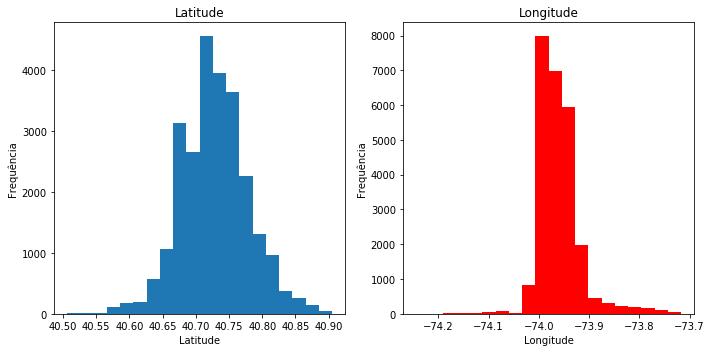

In [80]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plot=x['latitude'].plot.hist(bins=20)
plt.title('Latitude')
plt.ylabel('Frequência')
plt.xlabel('Latitude')

plt.subplot(122)
plot=x['longitude'].plot.hist(bins=20,color='r')
plt.title('Longitude')
plt.ylabel('Frequência')
plt.xlabel('Longitude')

plt.tight_layout()
plt.show()

Os histogramas acima evidenciam que a quantidade de airbnbs é concentrada em torno das longitudes -74 e -73.9, enquanto as latitudes são um pouco mais diluídas, mas também concentradas entre a faixa de 40.65 e 40.80. Dito isso, é possível ver uma clara concentração dos apartamentos nas latitudes/longitudes centrais, algo que pode justificar uma elevação dos preços nessa região, não somente por uma potencial melhor qualidade ou localização, mas também pela suposição de que uma região com uma densidade de apartamentos muito maior terá uma quantidade de apartamentos mais caros maior do que em outras regiões, mesmo assumindo que a probabilidade de um apartamento ser caro seja a mesma para todas as regiões.

Abaixo, foi plotado um gráfico tridimensional que mostra um plano composto pela latitude e longitude (eixos x e y, respectivamente), e com o preço no eixo z, para que a relação entre latitude, longitude, e preço possa ser analisada. O gráfico deste arquivo, entretanto, mostra somente a visão por um ângulo, algo que pode prejudicar a análise. Para visualizar o gráfico de maneira interativa, o arquivo "gráfico_interativo.ipynb" deve estar disponível na mesma pasta que este.

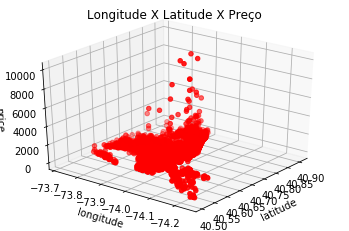

In [81]:
fig=plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x['latitude'],x['longitude'],y,c='r',marker='o')
ax.view_init(30,-142)
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_zlabel('price')
ax.set_title('Longitude X Latitude X Preço')
plt.show()

Ao analisar o gráfico acima, especialmente através de sua visualização interativa, pode-se evidenciar claramente que há uma concentração de apartamentos com um preço mais alto, em torno do centro do gráfico, nas latitudes 40.6->40.8, e nas longitudes -74->-73.9. Dessa forma, é possível visualisar um aumento nos preços na região central da cidade, algo que pode ser fruto da maior quantidade de apartamentos na região (como foi explicado pela suposição previamente mencionada), de variáveis como localização e qualidade serem de fato mais apelativas e portanto aumentam o preço, ou uma combinação dos dois fatores.

Para visualizar separadamente a relação entre longitude, latitude, e preço, foram plotados os gráficos de maneira bi-dimensional abaixo, a fim de analisar latitude e longitude separadamente.

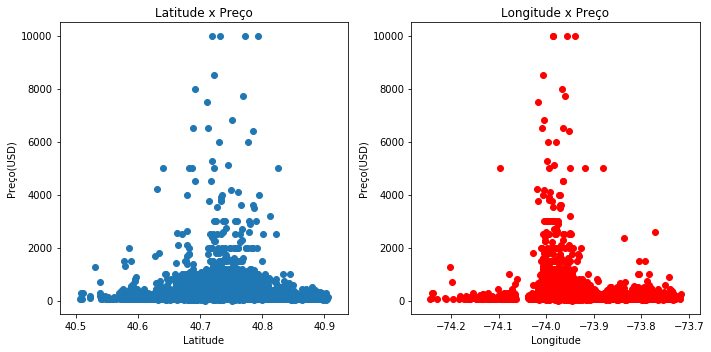

In [82]:
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(x['latitude'],y)
plt.title('Latitude x Preço')
plt.ylabel('Preço(USD)')
plt.xlabel('Latitude')

plt.subplot(122)
plt.scatter(x['longitude'],y,color='r')
plt.title('Longitude x Preço')
plt.ylabel('Preço(USD)')
plt.xlabel('Longitude')

plt.tight_layout()
plt.show()

Como pode ser evidenciado nos gráficos acima, as concentrações de preço préviamente mencionadas de fato ocorrem na região central, especialmente quando considerando a longitude, uma vez que seus dados aparentam estar concentrados de maneira mais forte em torno da longitude -74, enquanto a concentração na latitude é um pouco mais dispersa (tendo alguns valores mais caros começando nas latitudes mais extremas, não só no centro), apesar de ainda existente.

Para compreender ainda mais a fundo a concentração dos apartamentos mais caros, abaixo podem ser visualisados histogramas que contém apenas os apartamentos cujos preços são acima da média.

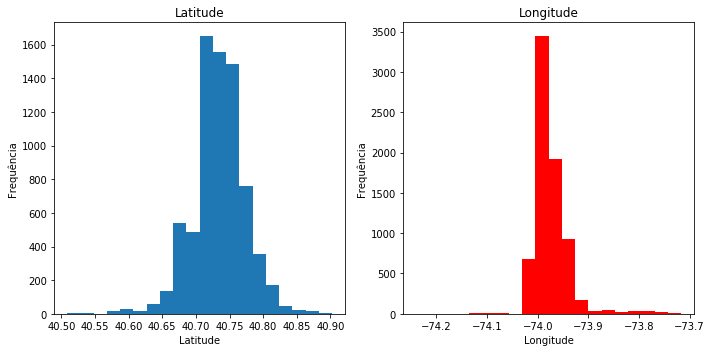

In [83]:
media_price=dados.price.mean()
data=dados[dados.price>media_price]
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plot=data['latitude'].plot.hist(bins=20)
plt.title('Latitude')
plt.ylabel('Frequência')
plt.xlabel('Latitude')

plt.subplot(122)
plot=data['longitude'].plot.hist(bins=20,color='r')
plt.title('Longitude')
plt.ylabel('Frequência')
plt.xlabel('Longitude')

plt.tight_layout()
plt.show()

Nos histogramas acima, são evidenciadas as mesmas tendências de concentração vistas nos scatterplots analisados previamente. Isso significa, que a quantidade de apartamentos acima da faixa média de preços está de fato concentrada em torno da latitude 40.7->40.8 e da longitude -74->-73.9. Pouco mais de 3500 (de um total de 7350) apartamentos estão listados entre latitudes 40.7 e 40.75, e quase todos estão entre as longitudes -74.05 e -73.9. Dessa forma, pode-se dizer que as coordenadas de um apartamento podem ter um impacto em seu preço, vistas as concentrações demonstradas na análise.

Portanto, esses atributos são importantes para poder predizer o preço de um apartamento, e assim devem ser incorporados em um modelo preditivo.

### Quantidade de reviews por mês:

A quantidade de reviews por mês que um apartamento tem, pode dar a idéia de confiança ao consumidor e assim aumentar a demanda e portanto o preço de um apartamento no longo prazo. Para ver se essa hipótese se aplica ao database em questão, é importante verificar tanto a distribuição da quantidade de reviews por mês quanto sua relação com o preço de um apartamento.

Abaixo, está o histograma que mostra a distribuição da quantidade de reviews por mês.

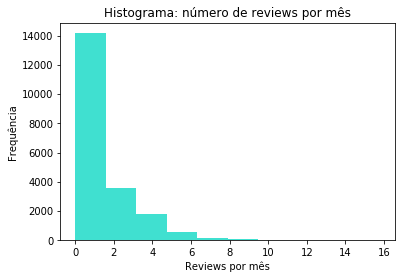

In [84]:
dados.reviews_per_month.plot.hist(bins=10,color='turquoise')
plt.ylabel('Frequência')
plt.xlabel('Reviews por mês')
plt.title('Histograma: número de reviews por mês')
plt.show()

Como pode ser evidenciado no histograma acima, a vasta maioria dos apartamentos tem menos de seis reviews por mês, sendo que grande parte está concentrada entre 0-2. Isso é de ser esperado, pois muitas vezes os apartamentos não são alugados múltiplas vezes por mês, fazendo com que estes valores sejam de fato baixos. Entretanto, como nas variáveis latitude/longitude, vale mencionar que devido à grande concentração em torno dos valores mais baixos, pode ser que hajam mais apartamentos caros nesses valores simplesmente por haverem mais apartamentos no geral.

Abaixo, está o scatterplot que mostra a relação entre a variável em questão e o preço dos apartamentos.

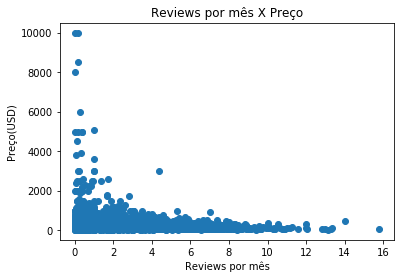

In [85]:
plt.scatter(dados['reviews_per_month'],dados['price'])
plt.xlabel('Reviews por mês')
plt.ylabel('Preço(USD)')
plt.title('Reviews por mês X Preço')
plt.show()

No gráfico acima, pode se notar que os preços mais baixos estão distribuídos de maneira uniforme, enquanto os valores mais altos estão mais concentrados nos apartamentos com poucos reviews. Como mencionado acima, isso pode ser mera casualidade, devido à maior presença de apartamentos nessa faixa de reviews (como mostra o histograma). Para ter uma noção diferente do gráfico, a fim de notar se de fato existe uma certa relação entre os dados ou não, o mesmo scatterplot foi plotado abaixo em escala logarítmica.

/Users/Kabbani/anacondanew3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


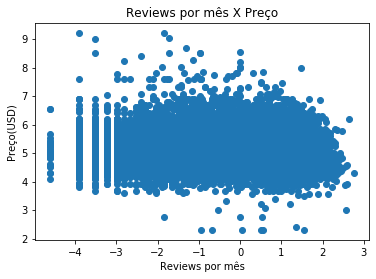

In [86]:
plt.scatter(np.log(dados['reviews_per_month'], dtype='float64'),np.log(dados['price'], dtype='float64'))
plt.xlabel('Reviews por mês')
plt.ylabel('Preço(USD)')
plt.title('Reviews por mês X Preço')
plt.show()

Como pode ser evidenciado acima, o atributo 'reviews por mês' não tem quase nenhuma relação com o preço de um airbnb. Portanto, é altamente provável que a hipótese de que os preços mais altos se concentrando nos valores menores seja uma mera consequência do fato de que existe uma concentração muito maior de apartamentos nesses valores.

Dessa forma, o atributo em questão não se mostra muito importante para a predição do preço de um apartamento, uma vez que sua relação com o preço é extremamente precária.

### Burgos de Nova Iorque:

In [87]:
dados = dados.loc[((dados.price > 10) & (dados.price < 1000))]

In [88]:
manhattan = dados.loc[(dados.neighbourhood_group == 'Manhattan')]
brooklyn = dados.loc[(dados.neighbourhood_group == 'Brooklyn')]
queens = dados.loc[(dados.neighbourhood_group == 'Queens')]
bronx = dados.loc[(dados.neighbourhood_group == 'Bronx')]
statenisland = dados.loc[(dados.neighbourhood_group == 'Staten Island')]

In [89]:
manhattan['price'].describe()

count    13013.000000
mean       222.513640
std        131.520429
min         11.000000
25%        140.000000
50%        190.000000
75%        250.000000
max        999.000000
Name: price, dtype: float64

In [90]:
brooklyn['price'].describe()

count    9507.000000
mean      167.696119
std       101.703522
min        11.000000
25%       104.500000
50%       145.000000
75%       198.500000
max       999.000000
Name: price, dtype: float64

In [91]:
statenisland['price'].describe()

count    173.000000
mean     134.953757
std      103.851740
min       48.000000
25%       75.000000
50%      100.000000
75%      150.000000
max      800.000000
Name: price, dtype: float64

In [92]:
queens['price'].describe()

count    2086.000000
mean      141.298178
std        81.101259
min        15.000000
25%        90.000000
50%       120.000000
75%       165.000000
max       900.000000
Name: price, dtype: float64

In [93]:
bronx['price'].describe()

count    378.000000
mean     125.198413
std       83.842376
min       28.000000
25%       80.000000
50%      100.000000
75%      140.000000
max      670.000000
Name: price, dtype: float64

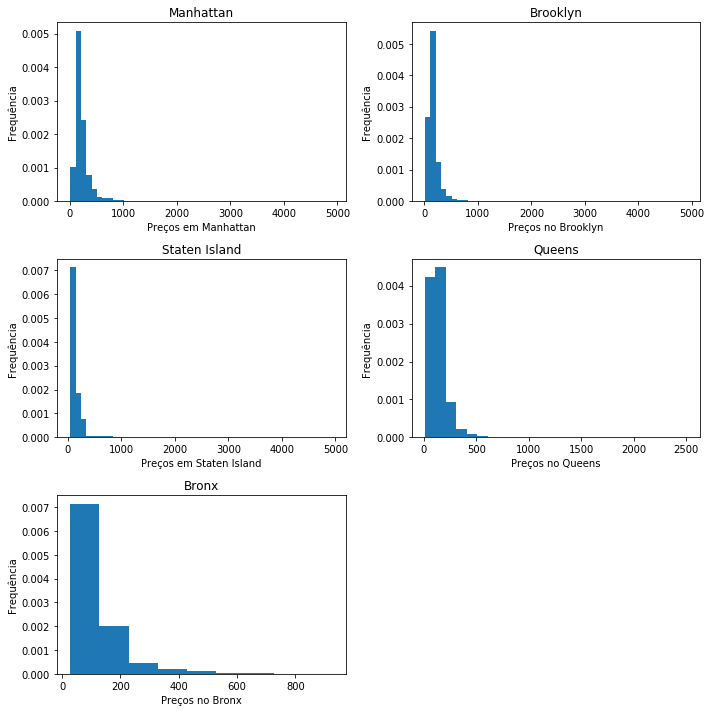

In [95]:
fig = plt.figure(figsize=(10, 10))

faixaman = range(10,5000,100)
faixabrook = range(10,5000,100)
faixastaten = range(48,5000,100)
faixabronx = range(28,1000,100)
faixaqueens = range(10,2600,100)

plt.subplot(321)
plot=manhattan['price'].plot.hist(bins=faixaman,density=True)
plt.title('Manhattan')
plt.ylabel('Frequência')
plt.xlabel('Preços em Manhattan')


plt.subplot(322)
plot=brooklyn['price'].plot.hist(bins=faixabrook,density=True)
plt.title('Brooklyn')
plt.ylabel('Frequência')
plt.xlabel('Preços no Brooklyn')


plt.subplot(323)
plot=statenisland['price'].plot.hist(bins=faixastaten,density=True)
plt.title('Staten Island')
plt.ylabel('Frequência')
plt.xlabel('Preços em Staten Island')


plt.subplot(324)
plot=queens['price'].plot.hist(bins=faixaqueens,density=True)
plt.title('Queens')
plt.ylabel('Frequência')
plt.xlabel('Preços no Queens')


plt.subplot(325)
plot=bronx['price'].plot.hist(bins=faixabronx,density=True)
plt.title('Bronx')
plt.ylabel('Frequência')
plt.xlabel('Preços no Bronx')
plt.tight_layout()
plt.show()

In [96]:
man = manhattan['price'].mean()
brook =  brooklyn['price'].mean()
queenao =  queens['price'].mean()
bronxobas =  bronx['price'].mean()
staten = statenisland['price'].mean()
print('O preço médio de um Airbnb em Manhattan é: U$D', manhattan['price'].mean())
print('O preço médio de um Airbnb em Brooklyn é: U$D', brooklyn['price'].mean())
print('O preço médio de um Airbnb em Staten Island é: ', statenisland['price'].mean())
print('O preço médio de um Airbnb no Queens é: U$D', queens['price'].mean())
print('O preço médio de um Airbnb no Bronx é: U$D', bronx['price'].mean())

man_std = manhattan['price'].std()
brook_std =  brooklyn['price'].std()
queenao_std =  queens['price'].std()
bronxobas_std =  bronx['price'].std()
staten_std = statenisland['price'].std()

O preço médio de um Airbnb em Manhattan é: U$D 222.5136402059479
O preço médio de um Airbnb em Brooklyn é: U$D 167.6961186494162
O preço médio de um Airbnb em Staten Island é:  134.95375722543352
O preço médio de um Airbnb no Queens é: U$D 141.2981783317354
O preço médio de um Airbnb no Bronx é: U$D 125.1984126984127


Text(0, 0.5, 'Valor em U$D')

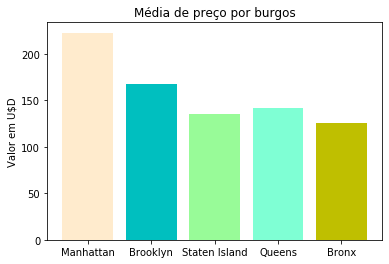

In [97]:
mean_burgos = {'Manhattan': man , 'Brooklyn': brook ,'Staten Island': staten, 'Queens': queenao, 'Bronx': bronxobas}
names=list(mean_burgos.keys())
values=list(mean_burgos.values())
plt.bar(names,values, color = ('blanchedalmond','c','palegreen','aquamarine','y'))
plt.title("Média de preço por burgos")
plt.ylabel('Valor em U$D')

In [98]:
#Inserir gráfico com margem de erro, colocar min e max de cada e escrever um textinho peq explicando.
burgos = ['Manhattan','Brooklyn','Staten Island','Queens','Bronx']
x_pos = np.arange(len(burgos))
medias_burgos = [man,brook,staten,queenao,bronxobas]
variacao = [man_std,brook_std,staten_std,queenao_std,bronxobas_std]

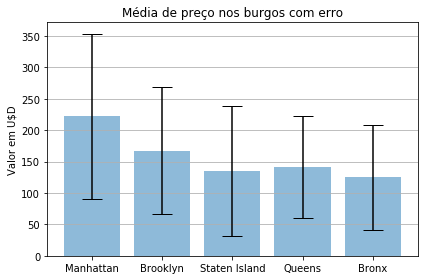

In [99]:
#Gráfico mostra a variação dos preços (quando formos fazer o proj final seria interessante comecar cm esses graficos e 
#depois ir mostrando como agnt 'ajusta' essa variacao)
fig, ax = plt.subplots()
ax.bar(x_pos, medias_burgos, yerr=variacao, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Valor em U$D')
ax.set_xticks(x_pos)
ax.set_xticklabels(burgos)
ax.set_title('Média de preço nos burgos com erro')
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

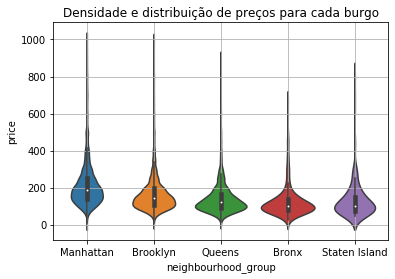

In [100]:
densida_e_distr=sns.violinplot(data=dados, x='neighbourhood_group', y='price')
densida_e_distr.set_title('Densidade e distribuição de preços para cada burgo')
densida_e_distr.grid(True)

A variável tratada acima mostra a diferença no comportamento da variável preço de acordo com a região (burgo) em que ela é analisada. A análise começa por plotando histogramas de cada região que nos permite analisar como estão distribuídos os preços de acordo com a frequência na qual estes aparecem. A primeira "simplificação"/"iteração" feita para deixar este gráfico algo mais pertinente ao trabalho, foi estabelecer um valor máximo ao valor do apartamento em qualquer região. Por que isso? Quase em todas as regiões, o apartamento com o valor mais caro era em torno dos 2000 dólares e em certas ocasiões, este valor chegava aos 10.000 dólares. Dado isso, optamos por simplificar e considerar o valor máximo de custo do apartamento, 1000 dólares, assim era feita uma análise mais pertinente, com valores mais próximos uns dos outros ao invés de poucos distantes que poderiam afetar a média de maneira não muito"justa", já que estes apartamentos são absurdamente caros.

Seguindo a análise, foi feito um segundo gráfico. Neste, analisamos a diferença na média de preço nos 5 burgos e como, obviamente, Manhattan é o com a maior média (aptos mais cara\os) e o Bronx, a com a menor média (aptos mais baratos). Mas a análise não parou por aí. Após analisar isto, surgiu uma dúvida a nós. Com o conhecimento que temos de Nova Yorque, foi feita uma análise para descobrir qual era o grau de erro presente nesse gráfico. O grau de erro, neste caso, era interprestado como a variação de preço nos diferentes burgos, eis que chegamos à conclusão que em Manhattan há uma variação maior no preço do que em qualuqer outro burgo. Isso acontece por dois motivos. O primeiro é que nossa amostra tem uma quantidade muito maior de  apartamentos em Manhattan, o que causa estes sterem uma maior variação entre eles, e o segundo é que os apartamentos em  lugares como o Bronx, tendem a ser mais padrão, não variando tanto de um para outro.

O último gráfico, feito com o seaborn, somente evidencia e mostra como os apartamentos de Manhattan (mesmo que mais caros) demonstram estarem mais espalhados no preço do que os outros burgos. 

### Disponibilidade:

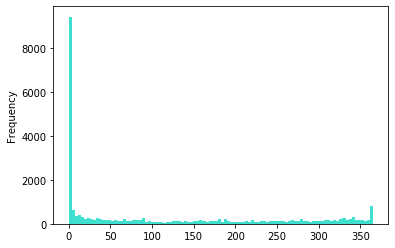

In [101]:
dados.availability_365.plot.hist(bins=100,color='turquoise')

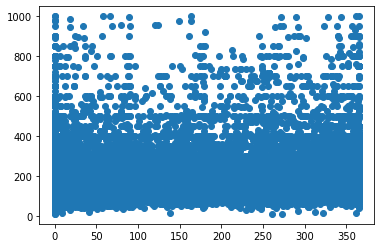

In [102]:
plt.scatter(dados.availability_365,dados.price)

A variável a ser analisada nesta seção é a chamada 'availability 365', que representa a quantidade de dias, no último ano, que o apartamento esteve disponível para aluguel. Como se trata de uma variável quantitativa, e trata o tópico de disponibilidade de aluguel de apartamentos, ela não oferece muita discussão se ele é analisada separadamente de todo resto, ou  seja, sozinha.

Por isso, tentamos compara-la à uma variável que  está bastante presente em nosso trabalho e esta é o preço dos apartwamentos em dólares americanos. Como pode-se observar acima, os valores em dólar  e a disponibilidade não fornecem qualquer tipo de correlação para a análise quantitativa do trabalho. Se nos aprofundarmos  no entendimento do trabalho, esta variável pode vir a ser  útil mais tarde, mas neste estágio de análise exploratória,  já provou ser uma variável que não terá muita importância no começo.